In [1]:
#imports
import os
import numpy as np
import pandas as pd
from tqdm import tqdm

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#helpers
def load_output_format_file(_output_format_file):
    _output_dict = {}
    _fid = open(_output_format_file, 'r')
    # next(_fid)
    for _line in _fid:
        _words = _line.strip().split(',')
        _frame_ind = int(_words[0])
        if _frame_ind not in _output_dict:
            _output_dict[_frame_ind] = []
        if len(_words) == 5: #polar coordinates 
            _output_dict[_frame_ind].append([int(_words[1]), int(_words[2]), float(_words[3]), float(_words[4])])
        elif len(_words) == 6: # cartesian coordinates
            _output_dict[_frame_ind].append([int(_words[1]), int(_words[2]), float(_words[3]), float(_words[4]), float(_words[5])])
        elif len(_words) == 7: # cartesian coordinates
            _output_dict[_frame_ind].append([int(_words[1]), int(_words[2]), float(_words[3]), float(_words[4]), float(_words[5]), float(_words[6])])    
    _fid.close()
    return _output_dict

In [3]:
#constants, variables
gt_dir = '/vast/sk8974/experiments/dsynth/data/input/gen_onlySynth_dist_noOv/metadata_dev/temp/'
pred_base_path = '/vast/sk8974/experiments/dsynth/scripts/seld_run/run/results/probe/'
unCoup_dir = pred_base_path + 'param_8/'
coup_dir = pred_base_path + 'param_9/'


In [4]:
gt_files = os.listdir(gt_dir)
unCoup_files = os.listdir(unCoup_dir)
coup_files = os.listdir(coup_dir)

In [5]:
# gt = load_output_format_file(gt_dir + file)
# coup = load_output_format_file(coup_dir + file)
# unCoup = load_output_format_file(unCoup_dir + file)

NameError: name 'file' is not defined

In [9]:
def get_dist(info,coup):
    if coup:
        x, y, z = info[2], info[3], info[4]
        r = np.sqrt(x ** 2 + y ** 2 + z ** 2)
        return r  
    else:
        return info[5]

def get_df_from_dict(file, coup=True):
    if coup:
        pred_dir = coup_dir
    else:
        pred_dir = unCoup_dir
        
    df = pd.DataFrame(columns=['gt_dist', 'azimuth', 'elevation', 'distance_abs_error', 'pred_dist'])
    gt = load_output_format_file(gt_dir + file)
    pred = load_output_format_file(pred_dir + file)
    for frame in pred:
        if frame in gt:
            gt_dist = gt[frame][0][4]
            #convert x,y,z to azimuth and elevation
            azimuth, elevation = gt[frame][0][2], gt[frame][0][3]
            pred_dist = get_dist(pred[frame][0],coup)
            distance_abs_error = abs(gt_dist - pred_dist)
            df = df.append({'gt_dist': gt_dist, 'azimuth': azimuth, 'elevation': elevation, 'distance_abs_error': distance_abs_error, 'pred_dist':pred_dist}, ignore_index=True)
    return df

In [12]:
df = get_df_from_dict(file, coup=False)

/state/partition1/job-29873149/ipykernel_1232246/623183117.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gt_dist': gt_dist, 'azimuth': azimuth, 'elevation': elevation, 'distance_abs_error': distance_abs_error}, ignore_index=True)
/state/partition1/job-29873149/ipykernel_1232246/623183117.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gt_dist': gt_dist, 'azimuth': azimuth, 'elevation': elevation, 'distance_abs_error': distance_abs_error}, ignore_index=True)
/state/partition1/job-29873149/ipykernel_1232246/623183117.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gt_dist': gt_dist, 'azimuth': azimuth, 'elevation': elevation, 'distance_abs_error': distance_ab

In [10]:
df_coup = pd.DataFrame(columns=['gt_dist', 'azimuth', 'elevation', 'distance_abs_error', 'pred_dist'])
for file in tqdm(coup_files):
    df = get_df_from_dict(file, coup=True)
    df_coup = df_coup.append(df,ignore_index=True)


100%|██████████| 300/300 [01:07<00:00,  4.43it/s]


In [11]:
df_unCoup = pd.DataFrame(columns=['gt_dist', 'azimuth', 'elevation', 'distance_abs_error'])
for file in tqdm(unCoup_files):
    df = get_df_from_dict(file, coup=False)
    df_unCoup = df_unCoup.append(df,ignore_index=True)

100%|██████████| 300/300 [01:02<00:00,  4.80it/s]


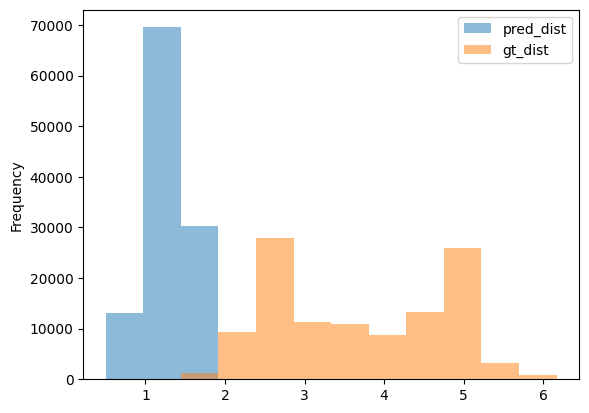

In [16]:
ax = df_coup[['pred_dist', 'gt_dist']].plot.hist(bins=12, alpha=0.5)

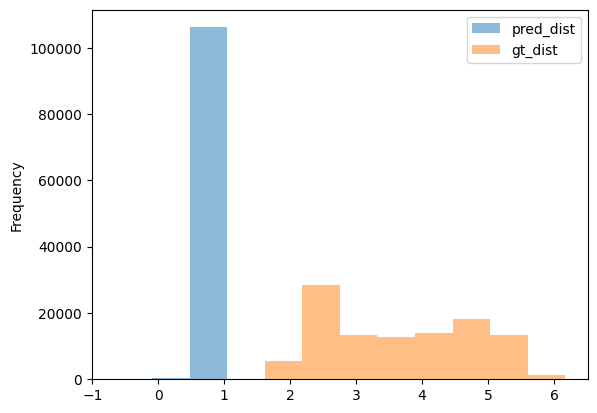

In [20]:
ax = df_unCoup[['pred_dist', 'gt_dist']].plot.hist(bins=12, alpha=0.5)

In [19]:
df_unCoup.head()

,gt_dist,azimuth,elevation,distance_abs_error,pred_dist
0,2.17,-173.0,12.0,1.192799,0.977201
1,2.17,-173.0,12.0,1.179772,0.990228
2,2.17,-173.0,12.0,1.177493,0.992507
3,2.17,-173.0,12.0,1.177354,0.992646
4,2.17,-173.0,12.0,1.177513,0.992487


<AxesSubplot: title={'center': 'coupled'}, xlabel='elevation', ylabel='distance_abs_error'>

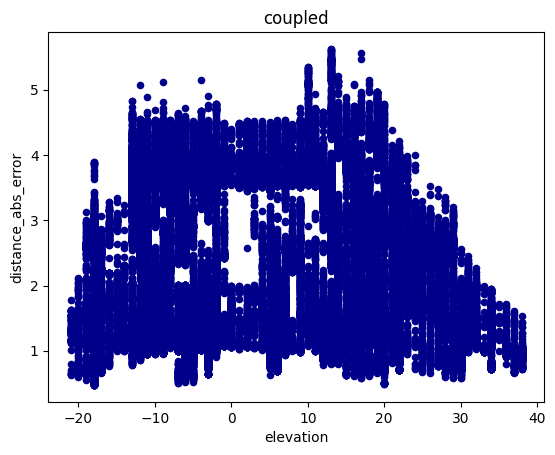

In [36]:
df_coup.plot.scatter(x='elevation',y='distance_abs_error',c='DarkBlue', title='coupled')


<AxesSubplot: title={'center': 'unCoupled'}, xlabel='azimuth', ylabel='distance_abs_error'>

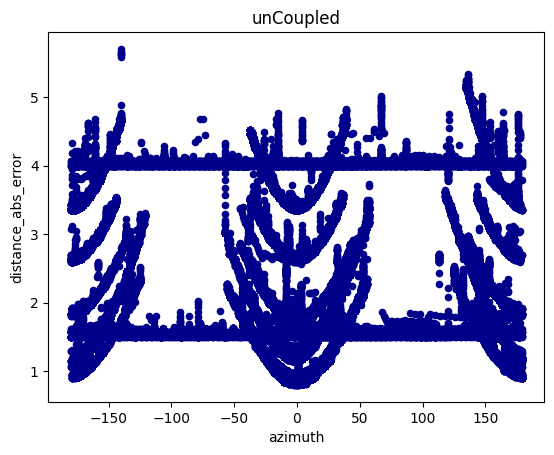

In [38]:
df_unCoup.plot.scatter(x='azimuth',y='distance_abs_error',c='DarkBlue', title='unCoupled')
